In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('ceden.csv', engine='python')

In [4]:
df.head()

,Program,ParentProject,Project,StationName,StationCode,SampleDate,CollectionTime,LocationCode,CollectionDepth,UnitCollectionDepth,SampleTypeCode,CollectionReplicate,ResultsReplicate,LabBatch,LabSampleID,MatrixName,MethodName,Analyte,Unit,Result,Observation,MDL,RL,ResultQualCode,QACode,BatchVerification,ComplianceCode,SampleComments,CollectionComments,ResultsComments,BatchComments,EventCode,ProtocolCode,SampleAgency,GroupSamples,CollectionMethodName,TargetLatitude,TargetLongitude,CollectionDeviceDescription,CalibrationDate,PositionWaterColumn,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,DilutionFactor,ExpectedValue,LabAgency,SubmittingAgency,SubmissionCode,OccupationMethod,StartingBank,DistanceFromBank,UnitDistanceFromBank,StreamWidth,UnitStreamWidth,StationWaterDepth,UnitStationWaterDepth,HydroMod,HydroModLoc,LocationDetailWQComments,ChannelWidth,UpstreamLength,DownstreamLength,TotalReach,LocationDetailBAComments,county,county_fips,regional_board,rb_number,huc8,huc8_number,huc10,huc10_number,huc12,huc12_number,waterbody_type,SampleID
0,2004-2011 Acterra,2004-2011 Acterra,2004-2011 Acterra Water Quality,Moss Rock,205STE100,1/9/2007,6:35:50,Not Recorded,-88.0,m,Not Recorded,1,1,NaN,NaN,samplewater,FieldMeasure,"ElectricalConductivity, Total",uS/cm,683,NaN,NaN,NaN,=,None,NR,Com,NaN,NaN,NaN,NaN,WQ,Not Recorded,Acterra,NaN,Water_Grab,37.272259,-122.082779,Not Recorded,1/1/1950,NaN,NaN,0000-00-00 00:00:00,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,85.0,San Francisco Bay,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-2011 Acterra,2004-2011 Acterra,2004-2011 Acterra Water Quality,Moss Rock,205STE100,2/25/2007,9:16:49,Not Recorded,-88.0,m,Not Recorded,1,1,NaN,NaN,samplewater,FieldMeasure,Temperature,Deg C,9.85,NaN,NaN,NaN,=,None,NR,Com,NaN,NaN,NaN,NaN,WQ,Not Recorded,Acterra,NaN,Water_Grab,37.272259,-122.082779,Not Recorded,1/1/1950,NaN,NaN,0000-00-00 00:00:00,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,85.0,San Francisco Bay,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-2011 Acterra,2004-2011 Acterra,2004-2011 Acterra Water Quality,Moss Rock,205STE100,4/22/2007,8:17:05,Not Recorded,-88.0,m,Not Recorded,1,1,NaN,NaN,samplewater,FieldMeasure,"ElectricalConductivity, Total",uS/cm,464,NaN,NaN,NaN,=,None,NR,Com,NaN,NaN,NaN,NaN,WQ,Not Recorded,Acterra,NaN,Water_Grab,37.272259,-122.082779,Not Recorded,1/1/1950,NaN,NaN,0000-00-00 00:00:00,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,85.0,San Francisco Bay,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-2011 Acterra,2004-2011 Acterra,2004-2011 Acterra Water Quality,Moss Rock,205STE100,4/22/2007,8:17:05,Not Recorded,-88.0,m,Not Recorded,1,1,NaN,NaN,samplewater,FieldMeasure,Temperature,Deg C,9.15,NaN,NaN,NaN,=,None,NR,Com,NaN,NaN,NaN,NaN,WQ,Not Recorded,Acterra,NaN,Water_Grab,37.272259,-122.082779,Not Recorded,1/1/1950,NaN,NaN,0000-00-00 00:00:00,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,85.0,San Francisco Bay,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-2011 Acterra,2004-2011 Acterra,2004-2011 Acterra Water Quality,Moss Rock,205STE100,5/19/2007,8:24:41,Not Recorded,-88.0,m,Not Recorded,1,1,NaN,NaN,samplewater,FieldMeasure,"Oxygen, Dissolved, Total",mg/L,10.89,NaN,NaN,NaN,=,None,NR,Com,NaN,NaN,NaN,NaN,WQ,Not Recorded,Acterra,NaN,Water_Grab,37.272259,-122.082779,Not Recorded,1/1/1950,NaN,NaN,0000-00-00 00:00:00,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santa Clara,85.0,San Francisco Bay,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Program                      60000 non-null  object 
 1   ParentProject                60000 non-null  object 
 2   Project                      60000 non-null  object 
 3   StationName                  60000 non-null  object 
 4   StationCode                  60000 non-null  object 
 5   SampleDate                   60000 non-null  object 
 6   CollectionTime               60000 non-null  object 
 7   LocationCode                 60000 non-null  object 
 8   CollectionDepth              60000 non-null  float64
 9   UnitCollectionDepth          60000 non-null  object 
 10  SampleTypeCode               60000 non-null  object 
 11  CollectionReplicate          60000 non-null  int64  
 12  ResultsReplicate             60000 non-null  int64  
 13  LabBatch        

In [6]:
# get 2 attributes

data = df[['Unit','Result']]

data

,Unit,Result
0,uS/cm,683
1,Deg C,9.85
2,uS/cm,464
3,Deg C,9.15
4,mg/L,10.89
...,...,...
59995,uS/cm,NaN
59996,NTU,NaN
59997,Deg C,26.6
59998,%,NaN


In [7]:
# drop missing value

data = pd.DataFrame.dropna(data)

data

,Unit,Result
0,uS/cm,683
1,Deg C,9.85
2,uS/cm,464
3,Deg C,9.15
4,mg/L,10.89
...,...,...
59990,uS/cm,1399
59991,uS/cm,1097
59992,%,67.1
59993,%,96.9


In [8]:
# drop string

data = data[~((data['Result'] == 'none') | (data['Result'] == 'Brown') | (data['Result'] == 'Clear') | (data['Result'] == 'Cloudy') | (data['Result'] == 'M') | (data['Result'] == 'NR') | (data['Result'] == 'OR') | (data['Result'] == 'yellow'))]
data['Result'] = data['Result'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55927 entries, 0 to 59997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit    55927 non-null  object 
 1   Result  55927 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# split data based on unit

prc = data.loc[(data['Unit'] == '%')]
bcs = data.loc[(data['Unit'] == 'BCS')]
cfs = data.loc[(data['Unit'] == 'cfs')]
cm = data.loc[(data['Unit'] == 'cm')]
deg = data.loc[(data['Unit'] == 'Deg C')]
fts = data.loc[(data['Unit'] == 'ft/s')]
gl = data.loc[(data['Unit'] == 'g/L')]
ms = data.loc[(data['Unit'] == 'm/s')]
mgl = data.loc[(data['Unit'] == 'mg/L')]
mpn = data.loc[(data['Unit'] == 'MPN/100 mL')]
ph = data.loc[(data['Unit'] == 'none')]
ntu = data.loc[(data['Unit'] == 'NTU')]
ppt = data.loc[(data['Unit'] == 'ppt')]
ugl = data.loc[(data['Unit'] == 'ug/L')]
uscm = data.loc[(data['Unit'] == 'uS/cm')]

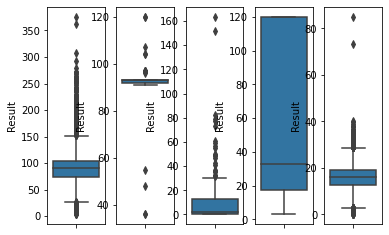

In [10]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y=prc['Result'], ax=axes[0])
sns.boxplot(y=bcs['Result'],ax=axes[1])
sns.boxplot(y=cfs['Result'],ax=axes[2])
sns.boxplot(y=cm['Result'],ax=axes[3])
sns.boxplot(y=deg['Result'],ax=axes[4])

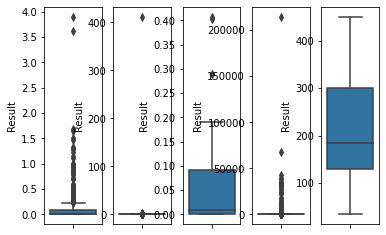

In [11]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y=fts['Result'], ax=axes[0])
sns.boxplot(y=gl['Result'],ax=axes[1])
sns.boxplot(y=ms['Result'],ax=axes[2])
sns.boxplot(y=mgl['Result'],ax=axes[3])
sns.boxplot(y=mpn['Result'],ax=axes[4])

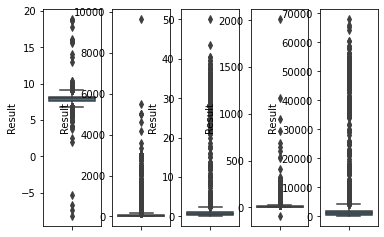

In [12]:
f, axes = plt.subplots(1, 5)
sns.boxplot(y=ph['Result'], ax=axes[0])
sns.boxplot(y=ntu['Result'],ax=axes[1])
sns.boxplot(y=ppt['Result'],ax=axes[2])
sns.boxplot(y=ugl['Result'],ax=axes[3])
sns.boxplot(y=uscm['Result'],ax=axes[4])

In [0]:
# check outlier

def outlier(dt):
  q1, q3 = np.percentile(dt,[25,75])
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)
  out = dt[((dt < lower) | (dt > upper))]
  return out

In [14]:
# insert '1' for data outlier

data.loc[outlier(prc['Result']).index, 'Class'] = '1'
data.loc[outlier(bcs['Result']).index, 'Class'] = '1'
data.loc[outlier(cfs['Result']).index, 'Class'] = '1'
data.loc[outlier(cm['Result']).index, 'Class'] = '1'
data.loc[outlier(deg['Result']).index, 'Class'] = '1'
data.loc[outlier(fts['Result']).index, 'Class'] = '1'
data.loc[outlier(gl['Result']).index, 'Class'] = '1'
data.loc[outlier(ms['Result']).index, 'Class'] = '1'
data.loc[outlier(mgl['Result']).index, 'Class'] = '1'
data.loc[outlier(mpn['Result']).index, 'Class'] = '1'
data.loc[outlier(ph['Result']).index, 'Class'] = '1'
data.loc[outlier(ntu['Result']).index, 'Class'] = '1'
data.loc[outlier(ppt['Result']).index, 'Class'] = '1'
data.loc[outlier(ugl['Result']).index, 'Class'] = '1'
data.loc[outlier(uscm['Result']).index, 'Class'] = '1'

# insert '0' for data non-outlier

data['Class'] = data['Class'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55927 entries, 0 to 59997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit    55927 non-null  object 
 1   Result  55927 non-null  float64
 2   Class   55927 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.2+ MB


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [26]:
normal = data[data['Class'] == 0]
anomaly = data[data['Class'] == '1']

print('Normal',normal.shape)
print('Outlier',anomaly.shape)

Normal (50526, 3)
Outlier (5401, 3)


Naive Bayes & k Nearest Neighbor

In [0]:
# variable selection, splitting into features and class

from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
features = data.drop(['Class'], axis = 1)
features['Unit'] = encode.fit_transform(features['Unit'])
features['Unit'] = features['Unit'].astype('int')
clas = data['Class'].astype('int')

In [0]:
# splitting into training and testing

f_train, f_test, c_train, c_test = tr(features, clas, test_size=0.2, random_state=42) # 80% data train, 20% data test

In [18]:
f_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44741 entries, 52843 to 16437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit    44741 non-null  int64  
 1   Result  44741 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


In [19]:
c_train

52843    0
52993    0
52151    0
19816    0
32134    0
        ..
48212    0
58132    0
40758    0
861      0
16437    0
Name: Class, Length: 44741, dtype: int64

In [0]:
#Create a Gaussian Classifier
naive = GaussianNB()

# Train the model using the training sets
naive.fit(f_train, c_train)

#Predict Output
cn_predict = naive.predict(f_test)

In [21]:
# confusion matrix
pd.crosstab(c_test, cn_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,9748,315
1,947,176


In [22]:
# Accuracy score
print("NAIVE BAYES\n")

print("F1-SCORE ",f1(c_test,cn_predict,average='macro'))

print("ACCURACY ",acc(c_test,cn_predict))

print("PRECISION ",pr(c_test,cn_predict,average='macro'))

print("RECALL",rec(c_test,cn_predict,average='macro'))

NAIVE BAYES

F1-SCORE  0.5786479299481497
ACCURACY  0.8871804040765242
PRECISION  0.6349530444685022
RECALL 0.5627101354078389


In [0]:
#Create a KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(f_train,c_train)

#Predict Output
ck_predict = knn.predict(f_test)

In [24]:
# confusion matrix
pd.crosstab(c_test, ck_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,10041,22
1,116,1007


In [25]:
# Accuracy score
print("K NEAREST NEIGHBOR\n")

print("F1-SCORE ",f1(c_test,ck_predict,average='macro'))

print("ACCURACY ",acc(c_test,ck_predict))

print("PRECISION ",pr(c_test,ck_predict,average='macro'))

print("RECALL",rec(c_test,ck_predict,average='macro'))

K NEAREST NEIGHBOR

F1-SCORE  0.9645243400659658
ACCURACY  0.9876631503665296
PRECISION  0.9835996621746069
RECALL 0.9472595135065827
